# Introduction and Problem

The Global Superstore dataset contains comprehensive sales data from a fictional retail company operating globally. It includes information on various aspects of the business, such as sales transactions, customer demographics, product categories, and regional data. The dataset is typically used to analyze sales performance, customer behavior, and operational efficiency, providing insights into how the company can improve its strategies and decision-making processes.

Some problem need to evaluate from the data to elevate the store:

1. How can we evaluate the overall sales and profit metrics to assess the current business performance of Global Superstore?
2. What are the trends and patterns in sales and revenue over time, and how do seasonal factors influence these metrics at Global Superstore?
3. How does sales performance vary across different product categories, and what strategies can be implemented to boost sales in underperforming categories?
4. How do sales patterns differ across various customer demographics, and what insights can be leveraged to personalize marketing strategies and increase customer engagement?
5. How can we accurately predict future sales based on historical data trends, and what insights can be derived to support strategic planning and decision-making at Global Superstore?

# Data Load and Data Processing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("superstore.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [3]:
# Check for missing values
data.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [4]:
# Check for duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [5]:
# Convert date columns to datetime
data['Order.Date'] = pd.to_datetime(data['Order.Date'])
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'])

# Create new features: Order month and day of the week
data['Order.Month'] = data['Order.Date'].dt.month
data['Order.DayOfWeek'] = data['Order.Date'].dt.dayofweek

In [6]:
# Calculate profit margin
data['Profit.Margin'] = data['Profit'] / data['Sales']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Category         51290 non-null  object        
 1   City             51290 non-null  object        
 2   Country          51290 non-null  object        
 3   Customer.ID      51290 non-null  object        
 4   Customer.Name    51290 non-null  object        
 5   Discount         51290 non-null  float64       
 6   Market           51290 non-null  object        
 7   记录数              51290 non-null  int64         
 8   Order.Date       51290 non-null  datetime64[ns]
 9   Order.ID         51290 non-null  object        
 10  Order.Priority   51290 non-null  object        
 11  Product.ID       51290 non-null  object        
 12  Product.Name     51290 non-null  object        
 13  Profit           51290 non-null  float64       
 14  Quantity         51290 non-null  int64

# 1. How can we evaluate the overall sales and profit metrics to assess the current business performance of Global Superstore?

In [8]:
# Calculate Total Sales and Total Profit
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()

# Display the results
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")

Total Sales: 12642905
Total Profit: 1467457.2912800002


In [9]:
# Calculate Key Performance Indicators (KPIs)
total_orders = data['Order.ID'].nunique()
average_order_value = total_sales / total_orders
average_profit_margin = (total_profit / total_sales) * 100

# Display the KPIs
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {average_order_value:.2f}")
print(f"Average Profit Margin: {average_profit_margin:.2f}%")

Total Orders: 25035
Average Order Value: 505.01
Average Profit Margin: 11.61%


In [10]:
# Analyze Trends Over Time
sales_trends = data.groupby(data['Order.Date']
                            .dt.to_period('M')).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_trends.head()


,Order.Date,Sales,Profit
0,2011-01,98902,8321.80096
1,2011-02,91152,12417.90698
2,2011-03,145726,15303.56826
3,2011-04,116927,12902.32438
4,2011-05,146762,12183.82870


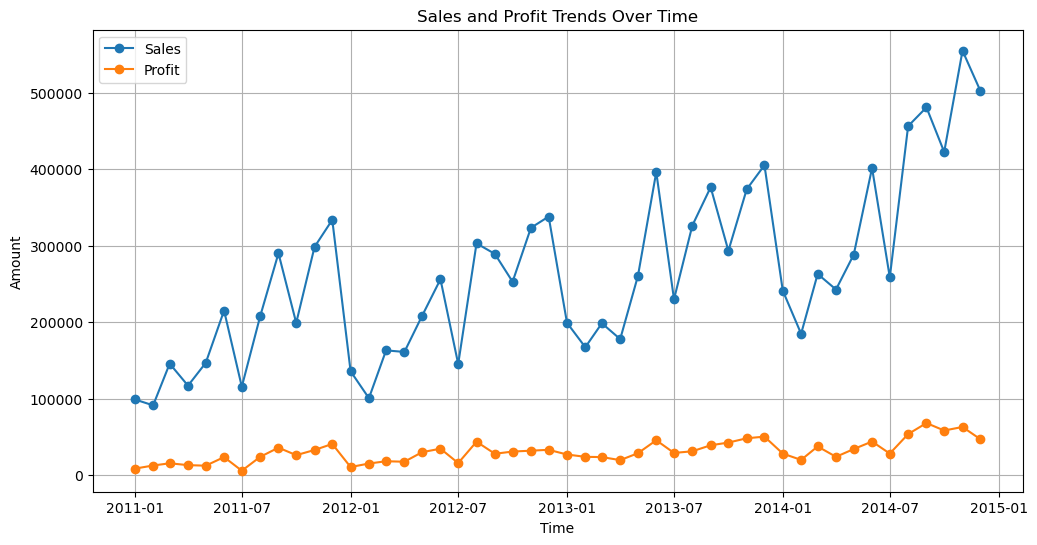

In [11]:
# Plot Sales and Profit Trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_trends['Order.Date'].dt.to_timestamp(), sales_trends['Sales'], label='Sales', marker='o')
plt.plot(sales_trends['Order.Date'].dt.to_timestamp(), sales_trends['Profit'], label='Profit', marker='o')
plt.title('Sales and Profit Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
sales_trends

,Order.Date,Sales,Profit
0,2011-01,98902,8321.80096
1,2011-02,91152,12417.90698
2,2011-03,145726,15303.56826
3,2011-04,116927,12902.32438
4,2011-05,146762,12183.82870
5,2011-06,215214,23415.24702
6,2011-07,115518,5585.00352
7,2011-08,207570,23713.66772
8,2011-09,290230,35776.88394
9,2011-10,199070,25963.41834


In [13]:
# Identify Top and Bottom Performing Segments
top_categories = data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
top_regions = data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
top_customers = data.groupby('Customer.ID').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False).head(10)

# Display top-performing categories, regions, and customers
print("Top Categories by Sales:")
print(top_categories)

print("\nTop Regions by Sales:")
print(top_regions)

print("\nTop 10 Customers by Sales:")
print(top_customers)

Top Categories by Sales:
                   Sales        Profit
Category                              
Technology       4744691  663778.73318
Furniture        4110884  285204.72380
Office Supplies  3787330  518473.83430

Top Regions by Sales:
                  Sales        Profit
Region                               
Central         2822399  311403.98164
South           1600960  140355.76618
North           1248192  194597.95252
Oceania         1100207  120089.11200
Southeast Asia   884438   17852.32900
North Asia       848349  165578.42100
EMEA             806184   43897.97100
Africa           783776   88871.63100
Central Asia     752839  132480.18700
West             725514  108418.44890
East             678834   91522.78000
Caribbean        324281   34571.32104
Canada            66932   17817.39000

Top 10 Customers by Sales:
             Sales     Profit
Customer.ID                  
SM-203204    25042 -1980.7393
TC-209804    19050  8981.3239
CS-118451    16655  2995.5816
SP-209202

In [14]:
# Analyze Profit Margins
data['Profit.Margin'] = (data['Profit'] / data['Sales']) * 100
low_margin_products = data[data['Profit.Margin'] < data['Profit.Margin'].mean()]

# Display products with low profit margins
print("\nProducts with Low Profit Margins:")
print(low_margin_products[['Product.Name', 'Sales', 'Profit', 'Profit.Margin']].drop_duplicates())


Products with Low Profit Margins:
Empty DataFrame
Columns: [Product.Name, Sales, Profit, Profit.Margin]
Index: []


"Products with Low Profit Margins" is showing as an empty DataFrame, it likely means that the condition used to filter low-margin products isn't identifying any products with a below-average profit margin. 

## Interpretastion

### Overview of Sales and Profit Metrics

- Total Sales: \\$12,642,905
- Total Profit: \\$1,467,457.29
- Total Orders: 25,035
- Average Order Value: \\$505.01
- Average Profit Margin: 11.61%

The overall sales and profit metrics indicate a healthy business performance. With over 12 million in sales and an average profit margin of 11.61%, Global Superstore demonstrates effective revenue generation. The average order value of $505.01 reflects a strong capacity for high-value transactions.

### Sales and Profit Trends Over Time
Analyzing the monthly sales and profit trends from 2011 to 2014 reveals several key insights:

- Seasonal Fluctuations: Sales and profits experience significant fluctuations throughout the year. Notably, sales peak during the last quarter of each year, particularly in December, which may be attributed to holiday shopping. For instance, December 2013 shows sales of \\$405,476 with a profit of \\$50,202.87, while December 2014 has sales of \\$503,154 with a profit of \\$46,916.52.

- Growth Over Time: There is a general upward trend in both sales and profits from 2011 to 2014, indicating business growth and expanding market reach. For instance, sales increased from \\$98,902 in January 2011 to \\$456,633 in August 2014.

- Key Growth Periods: Some months, such as June 2013 and August 2014, show exceptional growth, suggesting successful promotional campaigns or increased demand for certain products.

### Performance by Category
The analysis of sales by category provides insights into which product lines are driving revenue:

- Technology: With sales of \\$4,744,691 and a profit of \\$663,778.73, the technology category leads in performance, indicating a strong consumer interest and successful product offerings in this segment.

- Furniture: Generating \\$4,110,884 in sales with a profit of \\$285,204.72, the furniture category shows significant revenue, though the profit margin is lower than technology, suggesting potential areas for cost optimization.

- Office Supplies: Office supplies have sales of \\$3,787,330 and a profit of $518,473.83, highlighting steady demand and a solid profit contribution, likely due to recurrent purchases by businesses.

### Regional Sales Performance
The analysis of sales across various regions reveals where the company is performing well and where opportunities for growth exist:

- Central Region: With \\$2,822,399 in sales and \\$311,403.98 in profit, the Central region is the top-performing area, underscoring a strong market presence and customer base.

- South and North Regions: These regions show healthy sales but with varying profit margins, indicating potential for further expansion and optimization in marketing strategies.

- Emerging Markets: Regions like Oceania and Southeast Asia demonstrate notable sales but lower profits, suggesting the need for strategic initiatives to boost profitability and market penetration.

### Top Customers
Identifying top customers by sales provides insights into valuable customer segments:

- Top Customer (SM-203204): Despite high sales of \\$25,042, this customer segment incurs a negative profit of  -$1,980.74, highlighting the need to reassess pricing strategies or customer-specific promotions.

- Positive Contributions: Other top customers like TC-209804 and CS-118451 contribute positively to profits, demonstrating the importance of nurturing these relationships to enhance long-term profitability.

# 2. What are the trends and patterns in sales and revenue over time, and how do seasonal factors influence these metrics at Global Superstore?

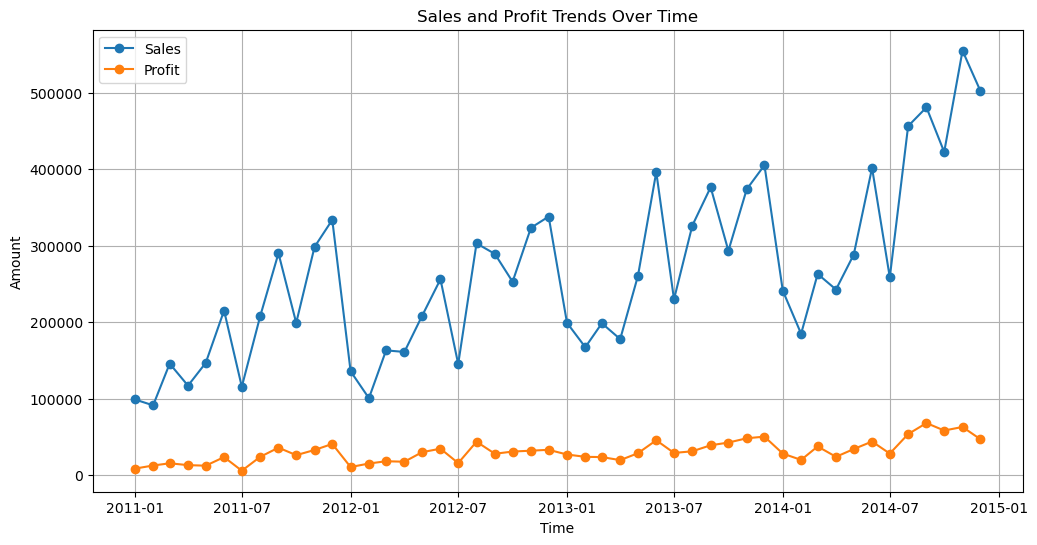

In [15]:
# Plot Sales and Profit Trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_trends['Order.Date'].dt.to_timestamp(), sales_trends['Sales'], label='Sales', marker='o')
plt.plot(sales_trends['Order.Date'].dt.to_timestamp(), sales_trends['Profit'], label='Profit', marker='o')
plt.title('Sales and Profit Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Category         51290 non-null  object        
 1   City             51290 non-null  object        
 2   Country          51290 non-null  object        
 3   Customer.ID      51290 non-null  object        
 4   Customer.Name    51290 non-null  object        
 5   Discount         51290 non-null  float64       
 6   Market           51290 non-null  object        
 7   记录数              51290 non-null  int64         
 8   Order.Date       51290 non-null  datetime64[ns]
 9   Order.ID         51290 non-null  object        
 10  Order.Priority   51290 non-null  object        
 11  Product.ID       51290 non-null  object        
 12  Product.Name     51290 non-null  object        
 13  Profit           51290 non-null  float64       
 14  Quantity         51290 non-null  int64

In [17]:
trend_data = data[['Order.Date','Sales','Profit', ]]

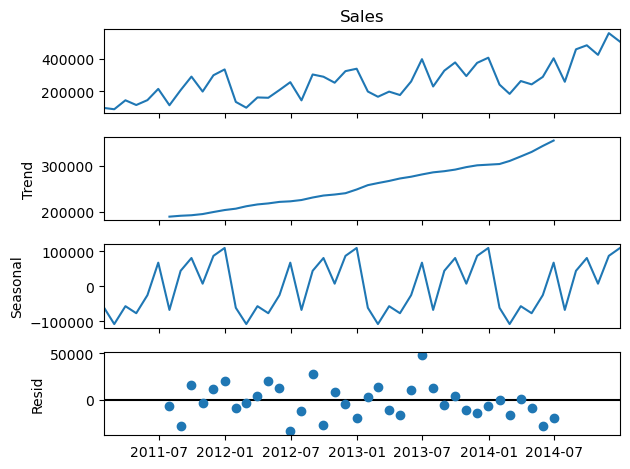

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

trend_data['Order.Date'] = pd.to_datetime(trend_data['Order.Date'])
trend_data.set_index('Order.Date', inplace=True)

# Resample data by month
monthly_sales = trend_data['Sales'].resample('M').sum()
monthly_profit = trend_data['Profit'].resample('M').sum()

# Seasonal Decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()

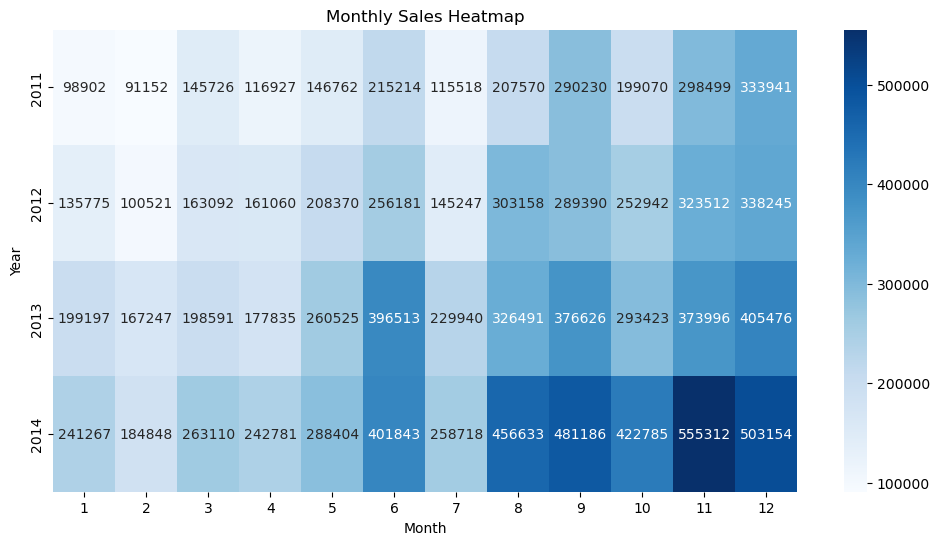

In [19]:
# Yearly Comparison
trend_data['Year'] = trend_data.index.year
trend_data['Month'] = trend_data.index.month
monthly_avg = trend_data.groupby(['Year', 'Month'])['Sales'].sum().unstack()

# Heatmap for Sales
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_avg, cmap='Blues', annot=True, fmt=".0f")
plt.title('Monthly Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [20]:
monthly_avg

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,98902,91152,145726,116927,146762,215214,115518,207570,290230,199070,298499,333941
2012,135775,100521,163092,161060,208370,256181,145247,303158,289390,252942,323512,338245
2013,199197,167247,198591,177835,260525,396513,229940,326491,376626,293423,373996,405476
2014,241267,184848,263110,242781,288404,401843,258718,456633,481186,422785,555312,503154


## Interpretation

### Strong End-of-Year Performance:

Sales are consistently higher in the last quarter (October to December) of each year.
December is often the highest-grossing month, reflecting possible holiday season effects and end-of-year purchases.
For instance, December sales in 2011 were \\$333,941, growing to \\$503,154 by December 2014.

### Seasonal Dips in Early Year:
Sales dip noticeably in the first three months (January to March) of each year.
For example, sales in February 2011 were \\$91,152, increasing to \\$184,848 by February 2014, but the growth is less dramatic compared to other months.

### Mid-Year Boost:
Sales start picking up from April and see a mid-year boost, likely due to mid-year sales campaigns or product launches.
By June and July, sales reach higher points than in the early months.
This is evident in July 2013 with sales of \\$229,940, followed by a significant increase to \\$258,718 in July 2014.

### Consistent Growth Pattern:
Despite early-year dips, there is a consistent increase in sales each subsequent month.
The mid-year and end-of-year months show consistent growth, suggesting robust sales strategies during these periods.

# 3. How does sales performance vary across different product categories, and what strategies can be implemented to boost sales in underperforming categories?

In [21]:
# Calculate sales and profit statistics for each category
category_stats = data.groupby('Category').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Order.ID': 'nunique'
}).reset_index()

category_stats.columns = ['Category', 'Total Sales', 'Average Sales', 'Total Profit', 'Average Profit', 'Unique Orders']
print(category_stats)

          Category  Total Sales  Average Sales  Total Profit  Average Profit  \
0        Furniture      4110884     416.249899  285204.72380       28.878567   
1  Office Supplies      3787330     121.105426  518473.83430       16.578961   
2       Technology      4744691     467.872103  663778.73318       65.454958   

   Unique Orders  
0           8195  
1          19003  
2           8354  


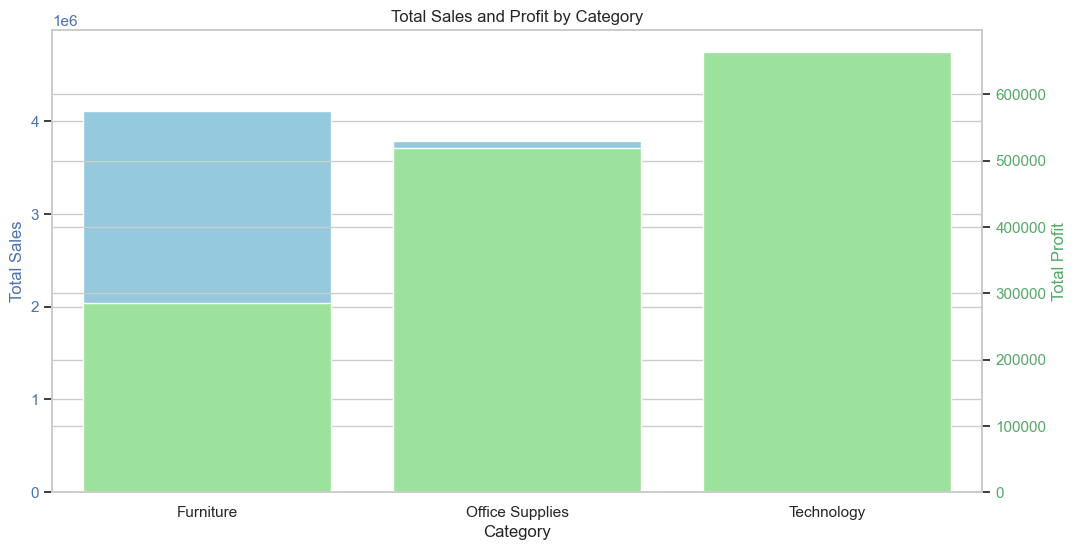

In [22]:
# Set the style of the plot
sns.set(style='whitegrid')

# Plot total sales and profit for each category
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='Category', y='Total Sales', data=category_stats, ax=ax1, color='skyblue', label='Total Sales')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.barplot(x='Category', y='Total Profit', data=category_stats, ax=ax2, color='lightgreen', label='Total Profit')
ax2.set_ylabel('Total Profit', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Total Sales and Profit by Category')
plt.show()

In [23]:
# Calculate profit margin for each category
category_stats['Profit Margin (%)'] = (category_stats['Total Profit'] / category_stats['Total Sales']) * 100
print(category_stats[['Category', 'Profit Margin (%)']])

          Category  Profit Margin (%)
0        Furniture           6.937795
1  Office Supplies          13.689693
2       Technology          13.989925


In [24]:
# Analyze sales and profit by sub-category
subcategory_stats = data.groupby('Sub.Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order.ID': 'nunique'
}).reset_index()

subcategory_stats['Profit Margin (%)'] = (subcategory_stats['Profit'] / subcategory_stats['Sales']) * 100

# Sort by sales to identify underperforming sub-categories
subcategory_stats = subcategory_stats.sort_values(by='Sales', ascending=False)
print(subcategory_stats)

   Sub.Category    Sales        Profit  Order.ID  Profit Margin (%)
13       Phones  1706874  216717.00580      3133          12.696720
6       Copiers  1509439  258567.54818      2120          17.130043
5        Chairs  1501682  140396.26750      3187           9.349268
4     Bookcases  1466559  161924.41950      2284          11.041112
14      Storage  1127124  108461.48980      4534           9.622853
1    Appliances  1011081  141680.58940      1686          14.012783
11     Machines   779071   58867.87300      1422           7.556163
16       Tables   757034  -64083.38870       836          -8.465061
0   Accessories   749307  129626.30620      2889          17.299492
3       Binders   461952   72449.84600      5392          15.683414
9   Furnishings   385609   46967.42550      2965          12.180065
2           Art   372163   57953.91090      4366          15.572185
12        Paper   244307   59207.68270      3234          24.234951
15     Supplies   243090   22583.26310      2281

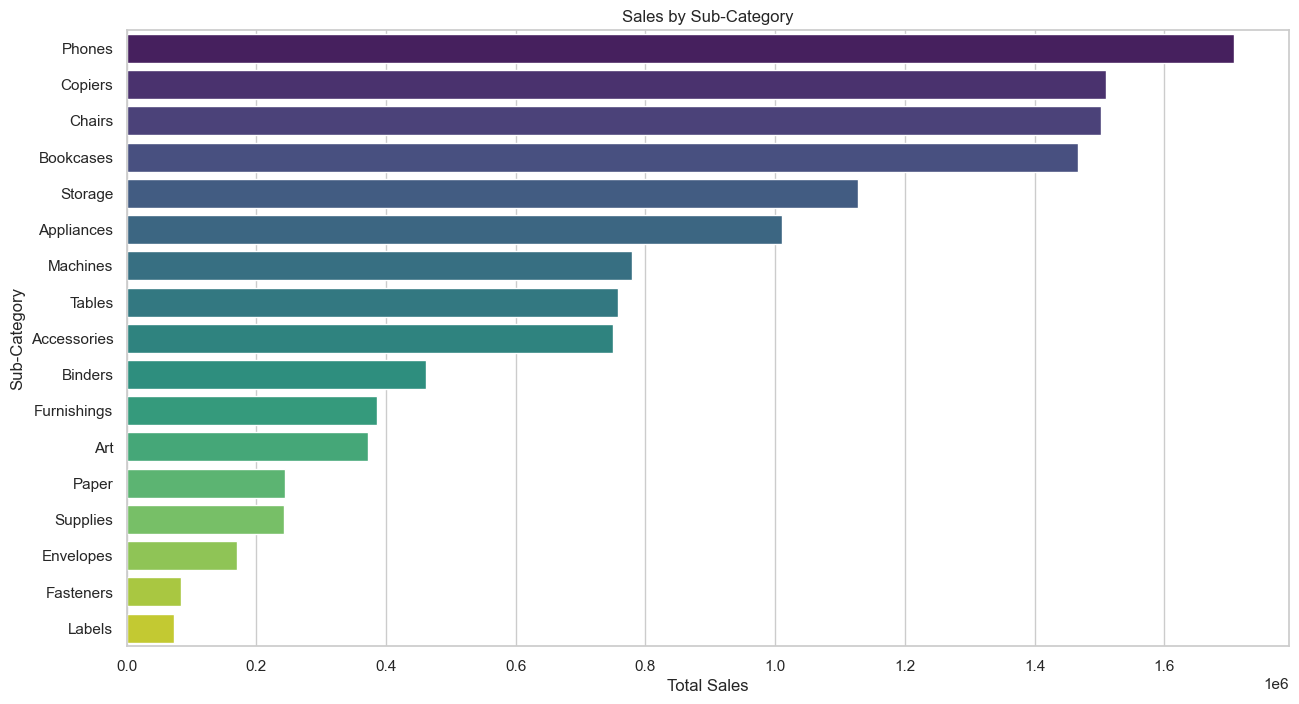

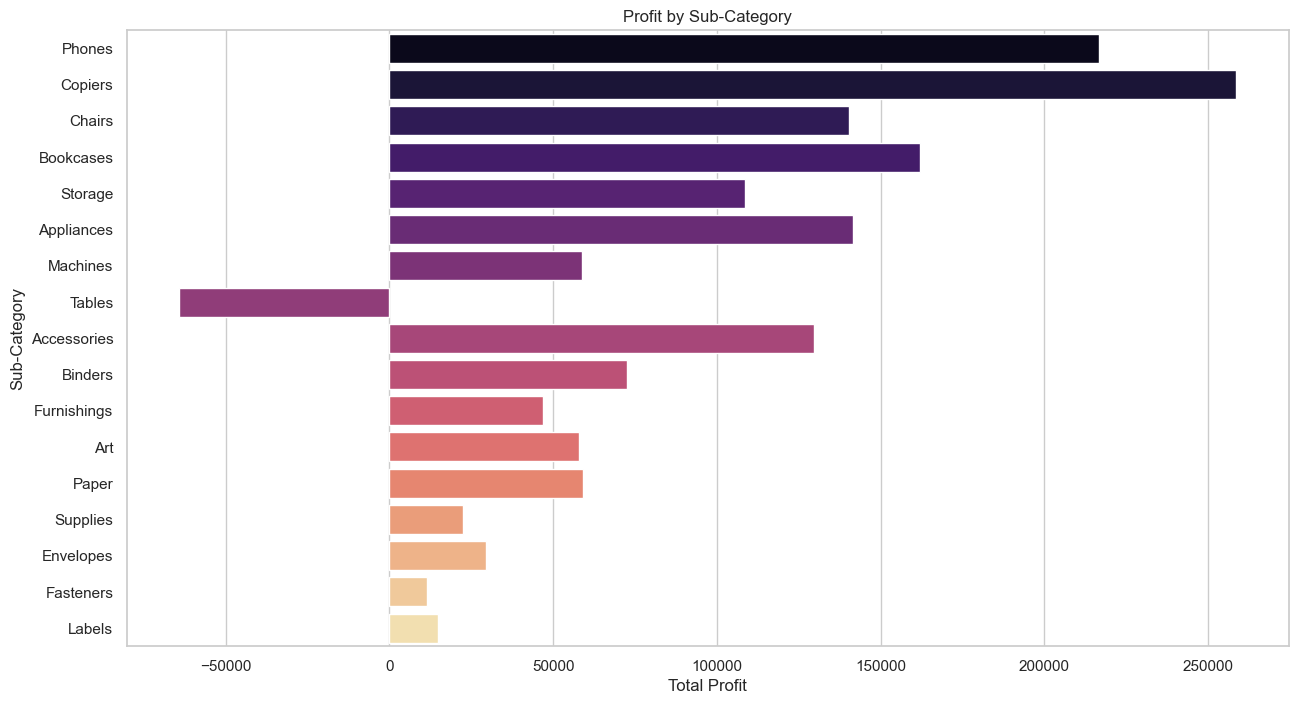

In [25]:
# Plot sales and profit for each sub-category
plt.figure(figsize=(15, 8))
sns.barplot(x='Sales', y='Sub.Category', data=subcategory_stats, palette='viridis', label='Sales')
plt.title('Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Profit', y='Sub.Category', data=subcategory_stats, palette='magma', label='Profit')
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()

## Interpretation

Interpretation and analysis of the sales performance across different product categories at Global Superstore, addressing how sales performance varies and providing strategies to boost sales in underperforming categories.

### Category Performance
**Technology:**

- Highest Sales and Profit: Technology is the top-performing category with the highest total sales and profit, accounting for significant revenue contribution.
- High Profit Margin: With a profit margin of 13.99%, Technology offers lucrative profit opportunities, especially in sub-categories like Copiers and Phones.

**Office Supplies:**

- Consistent Sales: This category shows stable sales, supported by high demand and frequent purchases.
- Moderate Profit Margin: The profit margin of 13.69% is solid, particularly due to strong sales in Binders and Paper sub-categories.

**Furniture:**

- Lower Profit Margin: Despite substantial sales figures, the Furniture category has the lowest profit margin of 6.94%, indicating potential issues in cost management or pricing strategies.
- Challenges in Sub-Categories: Sub-categories like Tables are underperforming, with negative profit margins, pointing to inefficiencies that need to be addressed.

### Sub-Category Performance
**High-Performing Sub-Categories:**
- Copiers and Phones: These sub-categories within Technology are performing exceptionally well, with high sales and profit margins, indicating strong customer demand and effective pricing strategies.

**Underperforming Sub-Categories:**
- Tables: This sub-category within Furniture is underperforming with negative profit margins, highlighting issues with cost or pricing strategies.
- Machines: Although sales are moderate, the profit margin is low, indicating potential cost inefficiencies.

### Strategies to Boost Sales in Underperforming Categories

- Price Optimization: Adjust prices based on elasticity analysis to increase demand for low-margin items.
- Targeted Promotions: Use customer segmentation to offer personalized promotions on Furniture products and Analyze past campaigns and implement similar successful promotions for Office Supplies.
- Bundle Offers: Create bundles with popular items to drive sales in Office Supplies. 

# 4. How do sales patterns differ across various customer demographics, and what insights can be leveraged to personalize marketing strategies and increase customer engagement?

In [26]:
# Group by customer demographics and calculate metrics
demographic_sales = data.groupby(['Segment', 'City', 'Country']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order.ID': 'count'
}).reset_index()

In [27]:
demographic_sales.head()

,Segment,City,Country,Sales,Profit,Order.ID
0,Consumer,Aachen,Germany,3126,984.855,14
1,Consumer,Aalen,Germany,980,283.005,1
2,Consumer,Aba,Nigeria,416,-799.065,8
3,Consumer,Abadan,Iran,310,16.380,3
4,Consumer,Abbeville,France,172,6.210,2


In [34]:
demographic_sales['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [28]:
demographic_sales['Average Sales'] = demographic_sales['Sales'] / demographic_sales['Order.ID']
demographic_sales['Average Profit'] = demographic_sales['Profit'] / demographic_sales['Order.ID']
demographic_sales['Profit Margin (%)'] = (demographic_sales['Profit'] / demographic_sales['Sales']) * 100

In [29]:
# Sort demographics by total sales and select top and bottom 5
demographic_sales_sorted = demographic_sales.sort_values(by='Sales', ascending=False)
top_demographics = demographic_sales_sorted.head(5)
bottom_demographics = demographic_sales_sorted.tail(5)

In [38]:
demographic_sales_sorted.head(5)

,Segment,City,Country,Sales,Profit,Order.ID,Average Sales,Average Profit,Profit Margin (%)
1875,Consumer,New York City,United States,136891,30618.8441,504,271.609127,60.751675,22.367317
1547,Consumer,Los Angeles,United States,89679,16508.7529,382,234.761780,43.216631,18.408717
4465,Corporate,New York City,United States,63391,14084.7411,266,238.312030,52.950155,22.218834
2053,Consumer,Philadelphia,United States,63205,-6134.4013,269,234.962825,-22.804466,-9.705563
1623,Consumer,Manila,Philippines,61946,-7106.3970,217,285.465438,-32.748373,-11.471922


In [39]:
demographic_sales_sorted.tail(5)

,Segment,City,Country,Sales,Profit,Order.ID,Average Sales,Average Profit,Profit Margin (%)
2036,Consumer,Pensacola,United States,2,-1.4760,1,2.0,-1.4760,-73.80
1258,Consumer,Jinja,Uganda,2,-2.2710,1,2.0,-2.2710,-113.55
1275,Consumer,Jupiter,United States,2,0.1548,1,2.0,0.1548,7.74
10,Consumer,Abilene,United States,1,-3.7584,1,1.0,-3.7584,-375.84
5213,Corporate,Waco,United States,1,-0.9452,1,1.0,-0.9452,-94.52


In [42]:
demographic_sales_sorted.describe()

,Sales,Profit,Order.ID,Average Sales,Average Profit,Profit Margin (%)
count,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,1766.755869,205.066698,7.167412,252.882481,35.798787,7.770948
std,4339.383605,1010.923741,16.798512,309.097118,107.234846,40.053924
min,1.000000,-11661.864000,1.000000,1.000000,-1330.492500,-375.840000
25%,173.000000,5.829500,2.000000,76.500000,3.959800,5.221028
50%,625.500000,69.453280,3.000000,167.490000,24.423000,19.000202
75%,1797.000000,296.885000,7.000000,311.872794,59.600550,29.227652
max,136891.000000,30618.844100,504.000000,4549.000000,1554.432000,50.782609


In [43]:
demographic_sales_sorted.describe(include=[object]) 

,Segment,City,Country
count,7156,7156,7156
unique,3,3636,147
top,Consumer,Valencia,United States
freq,2978,7,1026


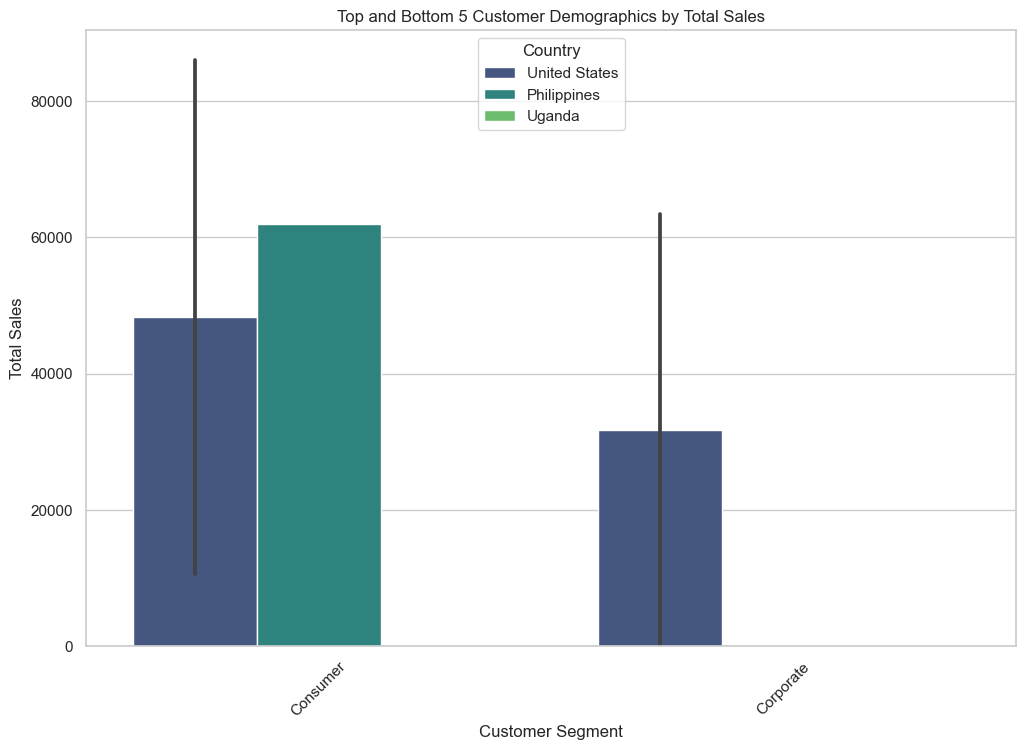

In [35]:
# Combine top and bottom demographics for plotting
plot_data = pd.concat([top_demographics, bottom_demographics])

# Plot Total Sales by Customer Demographics
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, x='Segment', y='Sales', hue='Country', palette='viridis')
plt.title('Top and Bottom 5 Customer Demographics by Total Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

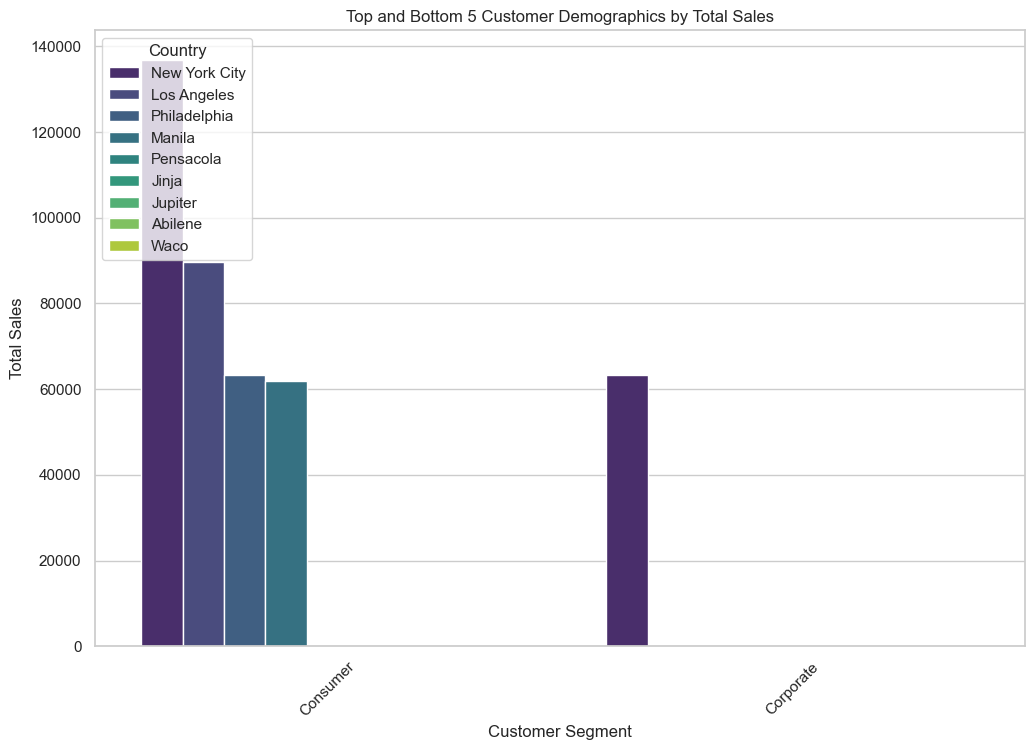

In [45]:
# Plot Total Sales by Customer Demographics
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, x='Segment', y='Sales', hue='City', palette='viridis')
plt.title('Top and Bottom 5 Customer Demographics by Total Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

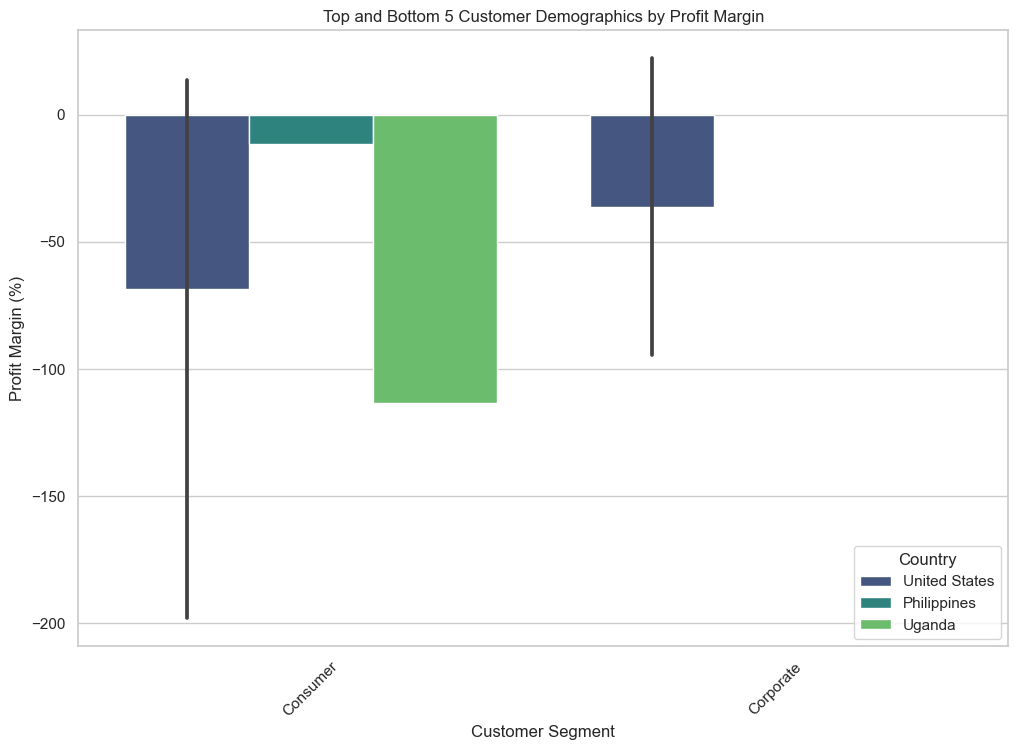

In [36]:
# Plot Profit Margin by Customer Demographics
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, x='Segment', y='Profit Margin (%)', hue='Country', palette='viridis')
plt.title('Top and Bottom 5 Customer Demographics by Profit Margin')
plt.xlabel('Customer Segment')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

## Interpretation

### Top Customer Demographics
- New York City and Los Angeles (Consumer Segment): These cities lead in total sales and profit, indicating a strong market presence. Focus on personalized marketing strategies to further engage these consumers.

- New York City (Corporate Segment): This segment shows high profitability, suggesting opportunities for targeted B2B solutions.

- Philadelphia and Manila (Consumer Segment): Despite high sales, negative profits point to pricing or operational inefficiencies. Reviewing pricing strategies and aligning products with local preferences can enhance profitability.

### Bottom Customer Demographics
- Pensacola and Jinja (Consumer Segment): Extremely low sales and significant losses highlight a lack of market presence. Consider reallocating resources or conducting market research to explore niche opportunities.

- Jupiter, Abilene, and Waco (Consumer Segment): Negligible sales with losses indicate these markets are currently non-viable. Evaluate market potential carefully before investing further resources.

# 5. How can we accurately predict future sales based on historical data trends?

In [48]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [49]:
Time_series_data = data[['Order.Date','Sales']]
Time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order.Date  51290 non-null  datetime64[ns]
 1   Sales       51290 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 801.5 KB


In [50]:
# Aggregate sales data by month
Time_series_data.set_index('Order.Date', inplace=True)
monthly_sales = Time_series_data.resample('M').sum()

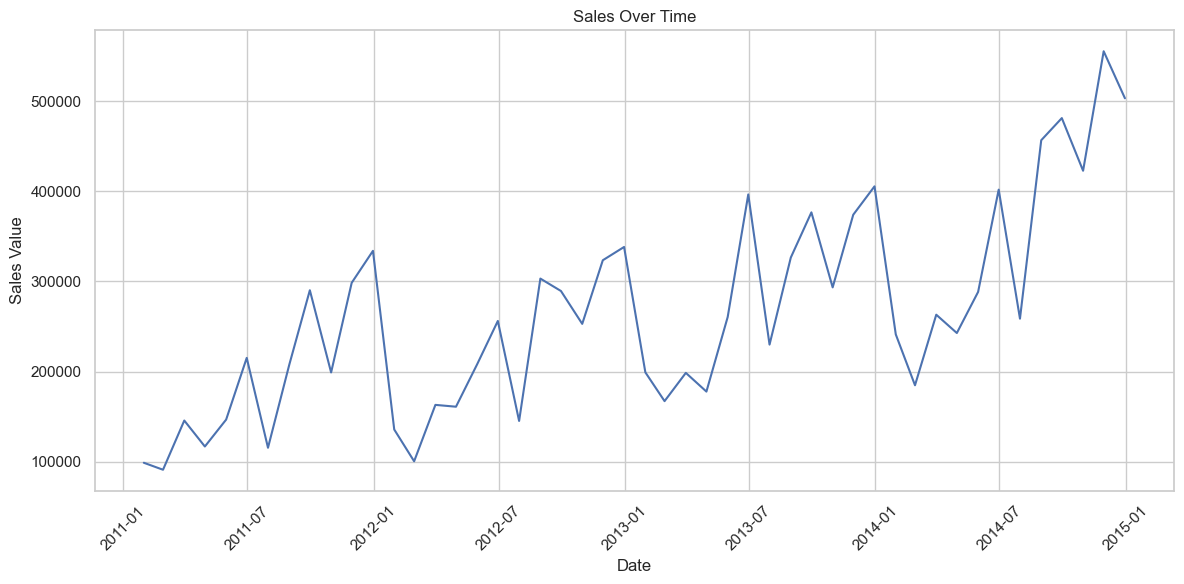

In [51]:
# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# Check for stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

check_stationarity(monthly_sales['Sales'])

ADF Statistic: 0.6184018167932409
p-value: 0.9880605281990905
The series is not stationary.


In [53]:
# Differencing if necessary to make the data stationary
sales_diff = monthly_sales['Sales'].diff().dropna()
check_stationarity(sales_diff)

ADF Statistic: -8.601153740048693
p-value: 6.863376441442412e-14
The series is stationary.


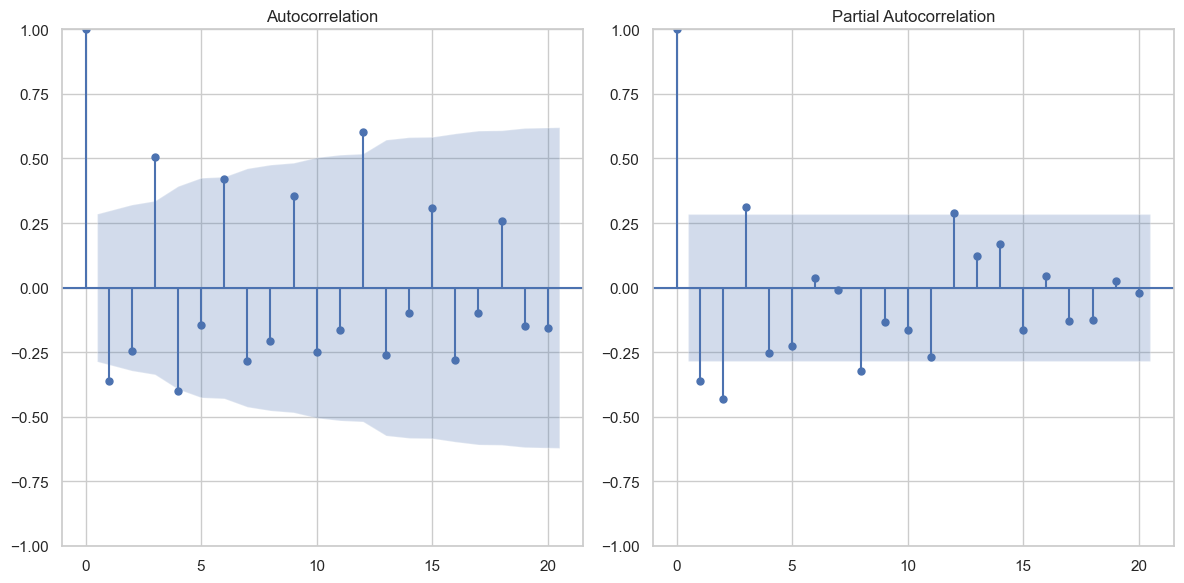

In [54]:
# Plot ACF and PACF to find p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(sales_diff, ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(sales_diff, ax=plt.gca(), lags=20)
plt.tight_layout()
plt.show()

In [55]:
# Choose ARIMA parameters (p, d, q)
p = 2  # From PACF plot
d = 1  # Differencing order
q = 1  # From ACF plot

# Fit ARIMA model
model = ARIMA(monthly_sales['Sales'], order=(p, d, q))
model_fit = model.fit()

In [56]:
# Forecast future sales for the next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

In [57]:
# Create future dates for forecast
forecast_dates = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), 
                               periods=forecast_steps, freq='M')

In [58]:
# Create a DataFrame for forecasted sales
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecast_sales': forecast
})
forecast_df.set_index('date', inplace=True)

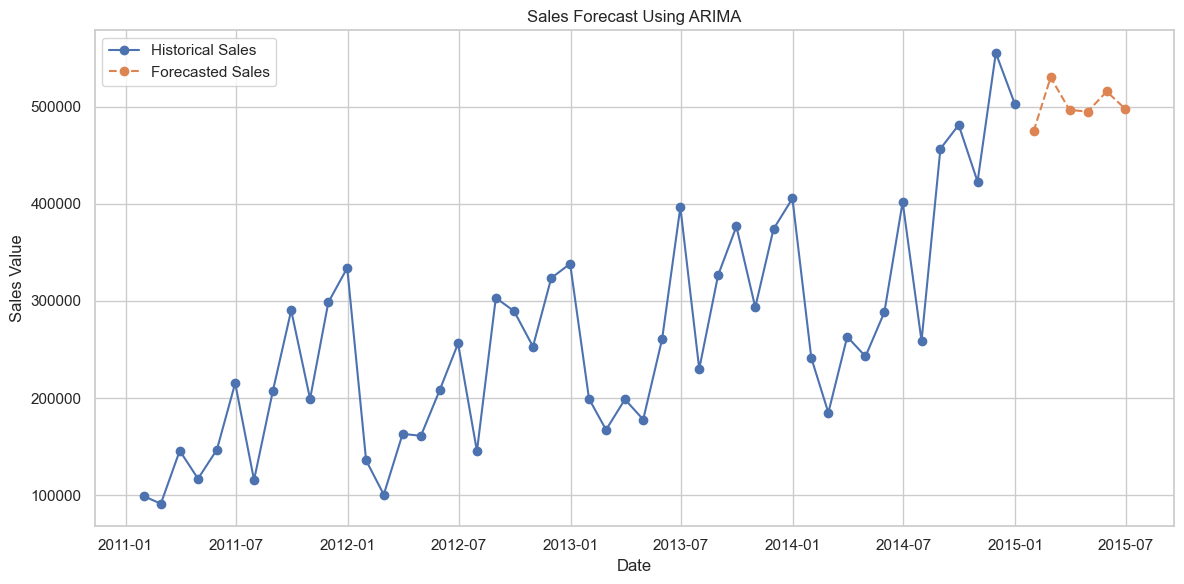

In [59]:
# Plot historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['forecast_sales'], label='Forecasted Sales', linestyle='--', marker='o')
plt.title('Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Interpretation

After using ARIMA model for forecasting next 6 months, the sales still experience the drop for next month with spike in second month. This could be happen if the sales and marketing strategy do the same formation. Further anaysis will be required to make data-driven decision, for example Mix Marketing Model to predict and calculate the perfect proportion of marketing distribution, Churn Analysis and Prediction to cluster which customer prefer to buy the product, or Sentiment Analysis to analyse what consument tend and require. 